In [5]:
import matplotlib.pyplot as plt
from pot_correction import *
from uncertain_dp2 import *

In [6]:
import pandas as pd
import numpy as np
import random

In [7]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 100

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [8]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
#check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

In [9]:



def compare_and_plot(read_correctors: list[t.Callable[[list[Read]],list[Read]]],*, names: list[str]=None,  iterations=4):
    if names is None:
        names = [str(i) for i in range(len(read_correctors))]

    all: list[list[float]] = [[] for _ in read_correctors]
    for _ in range(iterations):

        dna = generate_dna(DNA_LENGTH)
        reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

        for j, corrector in enumerate(read_correctors):
            corrected_reads = corrector(reads)
            all[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))


    plt.bar(
        names,
        [np.mean(measurement_row) for measurement_row in all],
        yerr=[pd.Series(measurement_row).sem() for measurement_row in all],
        capsize=6
    )

In [38]:
read_counts = [1,2,3,4,5,6,7,10,15,30,50]#,100]

results = [[] for _ in read_counts]
for i in range(4):
    dna = generate_dna(DNA_LENGTH)
    reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
    for j,read_count in enumerate(read_counts):
        rs = reads[:read_count]
        #rs = [rounded_read(r,5) for r in rs]
        corrected_reads = correct_reads_with_consens(rs, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS, probabilistic=True)
        results[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))

KeyboardInterrupt: 

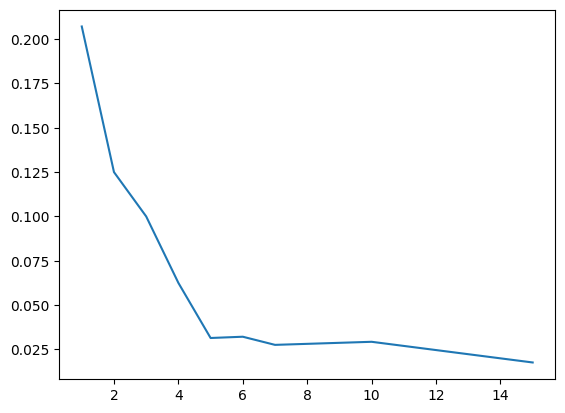

In [37]:
plt.plot(read_counts, [np.mean(measurement_row) for measurement_row in results], label="mean")